# Aula 14 - BERT para a classificação de texto

## BERT


**Introdução ao BERT**

O **BERT**, *Bidirectional Encoder Representations from Transformers*, é um marco revolucionário no campo do Processamento de Linguagem Natural (PLN), transformando a maneira como as máquinas compreendem a linguagem humana. Desenvolvido pelo Google em 2018, o BERT representa uma evolução significativa em relação aos modelos de PLN anteriores, como o Word2Vec e o GloVe, ao superar limitações fundamentais.

A busca por melhores modelos de linguagem sempre foi uma constante na pesquisa de PLN. Antes do BERT, os modelos eram unidirecionais, incapazes de contextualizar uma palavra com base em sua posição relativa na frase. BERT mudou isso ao adotar uma abordagem bidirecional, levando em conta o contexto das palavras à esquerda e à direita da palavra-alvo, melhorando drasticamente a capacidade de compreensão contextual.

O BERT utiliza uma arquitetura de Transformer, que é composta por camadas de atenção, permitindo que o modelo capture as relações complexas entre as palavras em uma sentença. Ao treinar em grandes quantidades de dados, BERT aprende a representação bidirecional de palavras em um contexto específico, criando vetores de palavras altamente contextuais e dinâmicos.


O BERT encontrou uma ampla gama de aplicações em tarefas de PLN, incluindo resumo de texto, classificação de sentimentos, perguntas e respostas, e até mesmo tradução automática. Sua capacidade de compreender o contexto e a semântica torna-o um candidato ideal para uma variedade de desafios linguísticos.


Uma das principais vantagens do BERT é sua capacidade de lidar com ambiguidades e nuances linguísticas, resultando em melhorias significativas na precisão em comparação com modelos anteriores. Além disso, a representação bidirecional permite ao BERT generalizar melhor para diferentes tarefas, reduzindo a necessidade de ajustes específicos.


Apesar de suas realizações impressionantes, o BERT também apresenta desafios. Seu tamanho considerável requer recursos computacionais substanciais, tornando o treinamento e a implementação mais intensivos em termos de hardware. Além disso, o BERT pode enfrentar dificuldades ao lidar com textos muito longos, devido às limitações de memória.

Em resumo, o BERT representa um avanço notável no PLN, transformando a forma como as máquinas entendem e processam a linguagem. Suas aplicações versáteis e melhorias significativas em relação aos modelos anteriores solidificam sua posição como uma referência na pesquisa e desenvolvimento de tecnologias baseadas em linguagem natural.






### Dataset do IMDB

O dataset do IMDB é um conjunto de dados amplamente utilizado na área de Processamento de Linguagem Natural (PLN) e aprendizado de máquina. Ele contém avaliações de filmes retiradas do site Internet Movie Database (IMDB), que são classificadas como positivas ou negativas.

O conjunto de dados é geralmente dividido em conjuntos de treinamento e teste, cada um contendo avaliações de filmes acompanhadas de suas respectivas classificações. A classificação é atribuída com base na opinião do autor da avaliação, onde geralmente avaliações com notas mais altas são consideradas positivas e as com notas mais baixas são consideradas negativas.


- **Textos das Avaliações:** Cada amostra no dataset contém o texto da avaliação de um filme.
- **Classificação:** A classificação associada à avaliação, indicando se a opinião é positiva ou negativa.
- **Conjunto de Treinamento e Teste:** O conjunto de treinamento é usado para treinar modelos, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos durante o treinamento.

Devido à natureza das avaliações, o dataset é frequentemente usado para tarefas de análise de sentimentos, onde o objetivo é determinar se uma opinião é positiva ou negativa.


## Exemplo
```plaintext
Texto da Avaliação: "Este filme foi incrível! A atuação e a trama foram excepcionais. Altamente recomendado."
Classificação: Positiva


Vamos começar pegando nosso banco de dados e explorando ele:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Vamos importar os dados

In [4]:

# Vespertino
caminho = '/content/drive/MyDrive/IMDB Dataset.csv'

#Noturno

df_inicial = pd.read_csv(caminho)

df_inicial.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Como podemos ver, o sentimento aqui é binário: as avaliações estão divididas entre as positivas e as negativas. Vamos ver quantas observações temos

In [5]:
df_inicial.shape

(50000, 2)

Temos 50000 observações no total, um número considerável. Vamos checar também a distribuição de observações entre as classes:

In [6]:
df_inicial['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


Pela primeira vez, temos um banco completamente balanceado entre as classes, isso nos ajuda a evitar vários problemas que tivemos anteriormente com os bancos de dados vistos até agora. No entanto, para reduzir o tempo de execução do BERT mais a frente, iremos trabalhar com só 2000 observações.

In [7]:
df = df_inicial.sample(n =2000, random_state = 42)


df.reset_index()

,index,review,sentiment
0,33553,I really liked this Summerslam due to the look...,positive
1,9427,Not many television shows appeal to quite as m...,positive
2,199,The film quickly gets to a major chase scene w...,negative
3,12447,Jane Austen would definitely approve of this o...,positive
4,39489,Expectations were somewhat high for me when I ...,negative
...,...,...,...
1995,33582,Even though this movie starts off with the usu...,positive
1996,31702,I thought that i wrote a comment on this movie...,positive
1997,38237,When Sabrina first came onto our screens i was...,positive
1998,22358,In print this is one of the greatest short sto...,positive


### Pré-processamento

Vamos precisar de mais pacotes para trabalhar com o BERT. A célula abaixo permite instalar a biblioteca transformers, onde está o modelo do BERT e seus auxiliares

In [8]:
!pip install transformers

Vamos importar agora o modelo e o PyTorch

In [9]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

Vamos importar o tokenizador do modelo

In [10]:
nome_modelo = 'bert-base-cased'


tokenizador = BertTokenizer.from_pretrained(nome_modelo)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]


O tokenizador do BERT é crucial para o seu desempenho, pois transforma textos em uma sequência de tokens que o modelo pode entender. Vamos explicar como funciona o tokenizador do BERT usando um exemplo. Suponhamos que temos a seguinte frase:


```plaintext
"O processador de linguagem natural BERT é incrível."


O primeiro passo do tokenizador do BERT é dividir o texto em palavras individuais. No exemplo, teríamos:

```plaintext
["O", "processador", "de", "linguagem", "natural", "BERT", "é", "incrível", "."]


Em seguida, o tokenizador adiciona tokens especiais para indicar o início e o fim da sequência. Além disso, são adicionados tokens especiais [CLS] e [SEP]:

```plaintext
["[CLS]", "O", "processador", "de", "linguagem", "natural", "BERT", "é", "incrível", ".", "[SEP]"]


[CLS]: Representa o início da sequência.

[SEP]: Indica o final da sequência ou a separação entre duas partes do texto.

Cada palavra e token especial agora é mapeado para um identificador único (ID) no vocabulário do BERT. O vocabulário contém um ID para cada palavra ou token possível.

```plaintext
[101, 146, 26548, 1010, 12314, 7898, 20183, 1012, 10411, 119, 102]


101: ID para [CLS]
146: ID para "O"
26548: ID para "processador"
1010: ID para "de"
...
119: ID para [SEP]
102: ID para [SEP]

O resultado final é uma sequência de IDs que representa o texto tokenizado:

In [11]:
[101, 146, 26548, 1010, 12314, 7898, 20183, 1012, 10411, 119, 102]


[101, 146, 26548, 1010, 12314, 7898, 20183, 1012, 10411, 119, 102]

Esta sequência tokenizada é a entrada que o BERT utiliza para processar e entender o texto durante o treinamento e a inferência. Cada ID representa uma palavra ou token específico, permitindo ao modelo capturar informações contextuais e relacionamentos semânticos durante o processamento. A figura abaixo, retirado de Devlin et al. (2018) [Disponível no moodle], resume o processo de tokenização do BERT

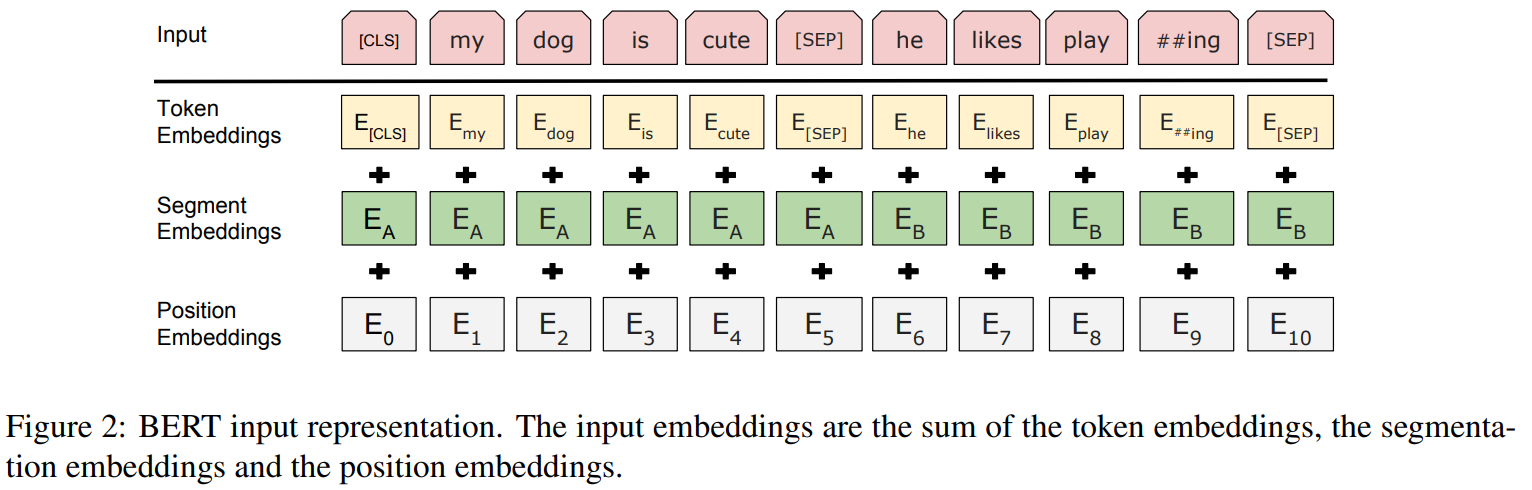

Vamos ver como isso funciona no código. Como o tokenizador original foi treinado para o inglês, vamos utilizar uma frase nesta língua

In [14]:
# Texto de exemplo
texto = "I love cats. But I also love dogs!"


tokenizador.tokenize(texto)

['I', 'love', 'cats', '.', 'But', 'I', 'also', 'love', 'dogs', '!']

Agora, vamos mapear cada token em seus respectivos IDs

In [15]:
tokens_id = tokenizador.encode(texto, add_special_tokens=True)

tokens_id

[101, 146, 1567, 11771, 119, 1252, 146, 1145, 1567, 6363, 106, 102]

Podemos ver que sempre temos o padrão da lista de tokens iniciar com o tokens especial [CLS] (101) e terminar com o [SEP] (102). Diferente dos modelos vistos até agora, o BERT não tem seus resultados muito afetados por uma grande quantidade de pré-processamento de texto. Por isso, não executaremos os passos vistos até agora (Mais [sobre](https://datascience.stackexchange.com/questions/113359/why-there-is-no-preprocessing-step-for-training-bert)).

Vamos criar um Dataloader que já inclue dentro dele o processamento das sentenças. Mas, vamos primeiro entender como adequamos as sentenças para a tarefa de classificação, utilizando o tokenizador.encode_plus()

In [16]:
df = df.reset_index()

In [17]:
# Extrair a primeira observação do review

texto = df['review'][0]

# Definir o tamanho máximo de texto por revisão (como são textos maiores que tweets, precisamos de mais informação)
MAX_LEN = 512

# Utilizar o método 'encode_plus' do tokenizador para codificar o texto
dic_codificado = tokenizador.encode_plus(texto,
    add_special_tokens=True,        # Adiciona tokens especiais ([CLS], [SEP])
    padding='max_length',           # Preenche ou trunca o texto para o tamanho máximo
    max_length=MAX_LEN,             # Tamanho máximo do texto por revisão
    return_attention_mask=True,     # Retorna uma máscara de atenção indicando onde estão os tokens reais
    return_tensors='pt',            # Retorna tensores do PyTorch
    truncation = True               # Certificar de que os tokens serão truncados
)

Podemos pegar algumas informações desse dicionário codificado. Por exemplo, podemos pegar os tokens com seus respectivos IDs.

In [18]:
padded_tokens = dic_codificado['input_ids'][0]

padded_tokens

tensor([  101,   146,  1541,  3851,  1142, 22596,  7609,  1496,  1106,  1103,
         1440,  1104,  1103,  8176,   117,  1103, 15800,  1105,  1198,  1103,
         1440,  2905,  1108,  5426,  1106,  1143,  1111,  1199,  2255,   119,
        10756,  1116,   117,  1142,  1180,  1138,  1151,  1141,  1104,  1103,
         1436, 22596,  7609,   112,   188,  1518,  1191,  1103, 17860,  1238,
          112,   189,  1138, 19993, 14557,  2895,  1107,  1103,  1514,  1856,
         1222, 14941,  2718, 10337,  1605,   117,  1208,  1111,  1122,   112,
          188,  1159,  1122,  1108, 21534,  1106,  1138,   170,  3321,  7930,
         1299,  5016,   170,  2012,  1299,  1133,   146,   112,   182,  5171,
         1551,  1138,  2014,   119,  1135,  1108,   170,  6434,  1514,  1856,
         1198,  1176,  1451,  1801, 14557,  2895,  1110,  1107,  1110,  6434,
          119,  2189,  2697,  1113,  1103,  3621,  1127, 16890, 24959, 19437,
         5016,  6564, 12120, 10242,  2217,   117, 23402,  5216, 

In [19]:
padded_tokens.shape

torch.Size([512])

Podemos pegar também as attention masks. As "attention masks" (máscaras de atenção) são componentes cruciais em modelos de linguagem, especialmente em arquiteturas baseadas em transformers, como o BERT. Essas máscaras são utilizadas para indicar quais partes do input devem ser consideradas durante o processo de atenção.

No contexto do BERT e modelos similares, a máscara de atenção é um tensor binário que possui o mesmo tamanho que a sequência de tokens de entrada. Cada elemento da máscara pode ter um valor de 0 ou 1, indicando se o token correspondente deve ser ignorado (valor 0) ou considerado (valor 1) durante o cálculo da atenção.

A função principal da máscara de atenção é permitir que o modelo lide com sequências de comprimentos variados. Em uma tarefa de processamento de linguagem natural (PLN), diferentes textos podem ter números diferentes de palavras ou tokens. A máscara de atenção garante que o modelo foque apenas nos tokens relevantes e ignore os tokens de preenchimento adicionados para igualar o comprimento.

No exemplo que fornecemos anteriormente, ao definir return_attention_mask=True no método encode_plus do tokenizador BERT, solicitamos explicitamente que uma máscara de atenção seja incluída no resultado. Isso permite que o modelo saiba quais partes do texto são tokens reais e quais são tokens de preenchimento quando estiver processando a entrada. Essa informação é crucial para garantir que o modelo atue corretamente, mesmo quando as sequências de entrada têm comprimentos diferentes.

In [20]:
att_mask = dic_codificado['attention_mask'][0]

att_mask

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Por fim, também podemos pegar os tipos de IDs dos tokens. O token_type_ids é um tensor que indica a que sequência pertence cada token na entrada. Geralmente, é usado para designar se um token faz parte da sequência A, da sequência B ou se é um token de preenchimento.

Sequência A (ou contexto): Tokens associados à primeira sequência, por exemplo, um parágrafo ou um contexto em tarefas de QA.
Sequência B (ou consulta): Tokens associados à segunda sequência, por exemplo, uma pergunta em tarefas de perguntas e respostas.

A configuração típica do token_type_ids envolve atribuir 0 para tokens que fazem parte da sequência A e 1 para tokens que fazem parte da sequência B. Tokens de preenchimento geralmente recebem o valor 0.

In [21]:
token_type_ids = dic_codificado['token_type_ids'][0]

token_type_ids

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Com essas definições, podemos criar o data-loader.

### DataSet e DataLoader

No PyTorch, um DataLoader é uma ferramenta essencial para carregar dados de forma eficiente durante o treinamento de modelos de aprendizado profundo. Ele faz parte do módulo torch.utils.data, e sua principal função é criar um iterador sobre um conjunto de dados.

Aqui estão os principais componentes e funções de um DataLoader:

Conjunto de Dados (Dataset): Um Dataset no PyTorch é uma classe que fornece acesso aos dados. Ele deve herdar da classe base torch.utils.data.Dataset e implementar os métodos __len__ e __getitem__. O método __getitem__ retorna uma amostra de dados.

Batching: Um DataLoader permite agrupar amostras em lotes (batches). Isso é importante para o treinamento eficiente de modelos, pois a maioria dos frameworks de aprendizado profundo realiza cálculos em lotes de dados para tirar vantagem da paralelização de hardware.

Iteração e Shuffle: O DataLoader cria um iterador sobre o conjunto de dados, facilitando o acesso sequencial aos lotes durante o treinamento. Além disso, ele pode embaralhar os dados (se shuffle=True), o que é crucial para evitar que o modelo aprenda padrões baseados na ordem dos dados.

In [22]:
from torch.utils.data import Dataset
import torch

MAX_LEN = 512

# Criamos um objeto/classe "TrainDataset" e colocamos como argumento um dataset
class TrainDataset(Dataset):

    def __init__(self, df):
        # Inicializar o conjunto de dados com o DataFrame fornecido
        self.df_data = df

    def __getitem__(self, index):
        # Obter as sentenças do DataFrame
        sentence = self.df_data.loc[index, 'review']

        # Processar a sentença usando o tokenizador BERT
        encoded_dict = tokenizador.encode_plus(
            sentence,
            add_special_tokens=True,         # Adicionar [CLS] e [SEP]
            padding='max_length',            # Preencher ou truncar para o tamanho máximo
            max_length=MAX_LEN,              # Tamanho máximo da sentença
            return_attention_mask=True,      # Retornar máscara de atenção
            return_tensors='pt',              # Retornar tensores PyTorch
            truncation = True
        )

        # Obter tensores relevantes
        padded_token_list = encoded_dict['input_ids'][0]
        att_mask = encoded_dict['attention_mask'][0]
        token_type_ids = encoded_dict['token_type_ids'][0]

        # Transformar o target em um tensor
        target = torch.tensor(self.df_data.loc[index, 'sentiment'])

        # Criar uma amostra com os tensores processados
        sample = (padded_token_list, att_mask, token_type_ids, target)

        return sample

    def __len__(self):
        # Retornar o comprimento do conjunto de dados
        return len(self.df_data)



Vamos definir outro objeto para o banco de teste (que dividiremos logo a frente).

In [23]:
class TestDataset(Dataset):

    def __init__(self, df):
        # Inicializar o conjunto de dados com o DataFrame fornecido
        self.df_data = df

    def __getitem__(self, index):
        # Obter as sentenças do DataFrame
        sentence = self.df_data.loc[index, 'review']

        # Processar a sentença usando o tokenizador BERT
        encoded_dict = tokenizador.encode_plus(
            sentence,
            add_special_tokens=True,         # Adicionar [CLS] e [SEP]
            padding='max_length',            # Preencher ou truncar para o tamanho máximo
            max_length=MAX_LEN,              # Tamanho máximo da sentença
            return_attention_mask=True,      # Retornar máscara de atenção
            return_tensors='pt',              # Retornar tensores PyTorch
            truncation = True
        )

        # Obter tensores relevantes
        padded_token_list = encoded_dict['input_ids'][0]
        att_mask = encoded_dict['attention_mask'][0]
        token_type_ids = encoded_dict['token_type_ids'][0]

        # Transformar o target em um tensor
        target = torch.tensor(self.df_data.loc[index, 'sentiment'])

        # Criar uma amostra com os tensores processados
        sample = (padded_token_list, att_mask, token_type_ids, target)

        return sample

    def __len__(self):
        # Retornar o comprimento do conjunto de dados
        return len(self.df_data)

#### Testando o Dataloader

Antes de partimos para o loop de treinamento, vamos ver se está tudo certo com o dataloader e fazer uma última transformação no banco de dados

In [24]:

# Vamos transformar nossa variável de sentimento em uma variável binária

def condition(x):
    if x == 'positive':
        return 1
    elif x == 'negative':
        return 0
    else:
        return 0

df2 = df.copy()

df2['sentiment'] = df2['sentiment'].apply(condition)


print(df2['sentiment'].value_counts())

sentiment
0    1024
1     976
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

df_train, df_teste = train_test_split(df2,
                                    test_size = 0.2, # Vamos deixar 20% do banco de dados para teste
                                    random_state = 42)


df_train = df_train.reset_index(drop=True)
df_teste = df_teste.reset_index(drop=True)


print('Tamanho do banco de Treino: ', len(df_train))
print('Tamanho do banco de Teste: ', len(df_teste))


Tamanho do banco de Treino:  1600
Tamanho do banco de Teste:  400


In [26]:
df_train

,index,review,sentiment
0,38722,There is only one reason this movie is watchab...,0
1,34062,The Priyadarshan/Paresh Rawal combo has been g...,0
2,19302,Here you see Mr. Eastwood in all of his glory ...,1
3,45055,We had STARZ free weekend and I switched on th...,0
4,9523,While studying the differences between religio...,0
...,...,...,...
1595,17026,After I saw this I concluded that it was most ...,0
1596,25036,There are bad movies and then there are movies...,0
1597,26037,The Last Hunt is one of the few westerns ever ...,1
1598,29875,---------SPOILER ALERT------------------------...,0


Vamos passar os dados pelo objeto DataSet e colocá-los dentro do dataloader. No PyTorch, Dataset e DataLoader são duas classes relacionadas que facilitam o carregamento eficiente e processamento de dados durante o treinamento de modelos de aprendizado profundo. Vamos entender cada uma delas:

A classe **Dataset** é uma classe base no PyTorch que fornece uma interface padrão para acessar conjuntos de dados. O objetivo principal de um Dataset é fornecer uma maneira consistente e padronizada de acessar amostras de dados. Ele deve herdar da classe base torch.utils.data.Dataset e implementar dois métodos principais: __len__ (para retornar o tamanho do conjunto de dados) e __getitem__ (para acessar uma amostra específica).

Um Dataset pode ser criado para representar um conjunto de dados de imagens, textos ou qualquer outra forma de dados.

A classe **DataLoader** é projetada para fornecer uma iteração eficiente sobre um Dataset, possibilitando o carregamento de lotes de dados e paralelização.
O DataLoader lida com o embaralhamento dos dados (se necessário), a criação de lotes, a paralelização de carregamento de dados (através do uso de vários processos) e outros detalhes relacionados ao treinamento eficiente de modelos.
Ao criar um DataLoader, você fornece um Dataset como argumento, juntamente com parâmetros como tamanho do lote, se deve embaralhar os dados, entre outros.



In [27]:
from torch.utils.data import DataLoader

# Vamos definir o batch_size em 32

BATCH_SIZE = 32

# Passando os dados de treino e teste pelos respectivos DataSets
dataset_treino = TrainDataset(df_train)
dataset_teste = TestDataset(df_teste)


# Passando os DataSets pelos DataLoaders
dataloader_treino = DataLoader(dataset_treino,
                               batch_size = BATCH_SIZE,
                               shuffle=True)

dataloader_teste = DataLoader(dataset_teste,
                               batch_size = BATCH_SIZE,
                               shuffle=True)


print(f'Tamanho do Dataloader de Treino: {len(dataloader_treino)}')
print(f'Tamanho do Dataloader de Teste: {len(dataloader_teste)}')

Tamanho do Dataloader de Treino: 50
Tamanho do Dataloader de Teste: 13


Vamos pegar um batch de treino e verificar se os tensores estão do tamanho adequado

In [28]:
# Get one train batch

padded_token_list, att_mask, token_type_ids, target = next(iter(dataloader_treino))

print(padded_token_list.shape)
print(att_mask.shape)
print(token_type_ids.shape)
print(target.shape)

torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32])


Temos batches de tamanho 32 (esperado) com o length de 512 (também esperado), parece que está tudo certo no dataloader de treino. Vamos fazer o mesmo com o de teste:

In [29]:
# Get one train batch

padded_token_list, att_mask, token_type_ids, target = next(iter(dataloader_teste))

print(padded_token_list.shape)
print(att_mask.shape)
print(token_type_ids.shape)
print(target.shape)

torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32, 512])
torch.Size([32])


Tudo certo, vamos para o modelo.

### Modelo

Antes de instanciar o modelo, vamos mudar da CPU (nosso processador) para a GPU colaborativa do google colab. Vá em "Ambiente de Execução" na aba na parte superior da tela e clique em "Alterar o tipo de ambiente de execução". EScolha entre "T4 GPU" e "TPU" e rode a célula abaixo. Se tudo estiver certo, a mensagem impressa será a de "Usaremos a GPU:..."

In [30]:
# Se houver uma GPU
if torch.cuda.is_available():

    # Use o GPU
    device = torch.device("cuda")

    print("Existem %d GPU(s) disponíveis.") # torch.cuda.device_cour

    print("Usaremos a GPU:", torch.cuda.get_device_name(0))

# Se não

else:
    print("Não há uma GPU disponível, utilizando a CPU")
    device = torch.device("cpu")

Existem %d GPU(s) disponíveis.
Usaremos a GPU: Tesla T4


Vamos, então, carregar o modelo. Para a tarefa de classificação de sentimento no IMDB, precisamos do "BertForSequenceClassification" do pacote de Transformers. Vamos também especificar o número de classes que o modelo vai trabalhar.

In [ ]:
# Carregar o BertForSequenceClassification, o BERT pré-treinado com uma
# unica camada linear de classificação por cima

from transformers import BertForSequenceClassification

# Nome do modelo
nome_modelo = 'bert-base-cased'

# Instanciando o modelo e o inserindo dentro do dispositivo
model = BertForSequenceClassification.from_pretrained(nome_modelo, num_labels = 2)
model.to(device)

#### Testando o modelo

Nesta célula, definiremos os hiperparâmetros a serem utilizados no processo de treinamento. O Learning Rate (L_RATE) e o número de Epochs (NUM_EPOCHS) foram definidos com base no Artigo de DEvlin et al. (2018).

#### CONFIGS

In [ ]:
import os

# Número total de folds usados para validação cruzada
NUM_FOLDS = 5

# Número de folds que serão usados para o treinamento. Pode ser diferente de NUM_FOLDS se necessário.
NUM_FOLDS_TO_TRAIN = 5

# Taxa de aprendizado do otimizador. Controla o tamanho dos passos durante o treinamento.
L_RATE = 3e-5

# Tamanho máximo de sequência. Utilizado ao tokenizar textos para garantir que todas as sequências tenham o mesmo comprimento.
MAX_LEN = 512

# Número de épocas de treinamento. Uma época é uma passagem completa pelo conjunto de dados de treinamento.
NUM_EPOCHS = 5

# Tamanho do lote. Especifica quantas amostras são processadas antes de uma atualização de modelo durante o treinamento.
BATCH_SIZE = 16

# Número de núcleos de CPU disponíveis no sistema. Pode ser usado para ajustar a paralelização de operações.
NUM_CORES = os.cpu_count()

Essas constantes fornecem informações importantes sobre a configuração do treinamento do modelo:

NUM_FOLDS e NUM_FOLDS_TO_TRAIN: Definem o número total de folds para validação cruzada e o número de folds a serem usados para o treinamento, respectivamente.

L_RATE: Especifica a taxa de aprendizado do otimizador, controlando o tamanho dos passos durante o treinamento.

MAX_LEN: Define o tamanho máximo de sequência, utilizado durante a tokenização para garantir que todas as sequências tenham o mesmo comprimento.

NUM_EPOCHS: Indica o número de épocas de treinamento, ou seja, quantas vezes o modelo passará por todo o conjunto de dados de treinamento.

BATCH_SIZE: Define o tamanho do lote, que especifica quantas amostras são processadas antes de uma atualização de modelo durante o treinamento.

NUM_CORES: Obtém o número de núcleos de CPU disponíveis no sistema, podendo ser usado para ajustar a paralelização de operações, dependendo da configuração do hardware.

Vamos importar também algumas utilidades que facilitarão o processo

In [ ]:
#Utilities
from torch.utils.data import TensorDataset, random_split, Subset
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

Vamos checar se o modelo está funcionado. Nas seguinte células, vou passar para o modelo os dados e ele vai fazer previsões sem nenhum treinamento. O intuito aqui é entender se há algum problema no tamanho dos tensores, em seus formatos, etc.

#### TESTE

**AVISO: Ao rodar as células abaixo, se consome muito da RAM, rode uma vez quando estiver lendo o tutorial pela primeira vez. Depois, quando for rodar o loop de treinamento, não execute as células abaixo. Você provavelmente vai precisar desconectar e excluir o ambiente de execução para recuperar a RAM perdida nas células abaixo**.

[Não consegui encontrar nenhum jeito de limpar bem a RAM, desculpem-me haha.]

In [ ]:
# Re-instanciando o dataloader de treino
dataloader_treino = DataLoader(dataset_treino,
                               batch_size = BATCH_SIZE,
                               shuffle=True)

# Pegando um batch de treino (se continuar rodando, isso vai iterar por todos os batches do dataloader)
batch = next(iter(dataloader_treino))

b_input_ids = batch[0].to(device)
b_input_mask = batch[1].to(device)
b_token_type_ids = batch[2].to(device)
b_labels = batch[3].to(device)

In [ ]:
# Fornecendo os inputs ao modelo
outputs = model(b_input_ids,
                token_type_ids=b_token_type_ids,
                attention_mask=b_input_mask,
                labels=b_labels)

In [ ]:
# Verificando o resultado
outputs

In [ ]:
# Predições no primeiro texto

outputs[1]

In [ ]:
# Pegando as predições sem a função de ativação
preds = outputs[1].detach().cpu().numpy()

# Pegando os valores
y_true = b_labels.detach().cpu().numpy()

# Transformando o array visto na célula anterior no valor das classes que temos (0 e 1)
y_pred = np.argmax(preds, axis = 1)


# Imprimindo o array final
y_pred

In [ ]:
# Accuracy obtida sem nenhum treinamento

val_acc = accuracy_score(y_true, y_pred)

val_acc

**FIM DAS CÉLULAS DE TESTE**

#### Métricas

Vamos estabelecer algumas métricas para calcular com base nos tensores gerados pelo Pytorch

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# Função para calcular a accuracy de nossas predições vs. labels

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


# Precision, Recall e F1_score separados

def precision_recall_f1(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    # labels_flat = labels.flatten()
    metricas = precision_recall_fscore_support(labels,
                                               pred_flat,
                                               average = None,
                                               labels = [0,1],
                                               zero_division = 0)

    precisao, revocacao, f1, suporte = metricas

    return precisao, revocacao, f1, suporte




Vamos checar se as métricas estão funcionando com as predições feitas no teste

In [ ]:
precision, recall, f1, suporte = precision_recall_f1(preds,y_true)

print(precision)
print(recall)
print(f1)
print(suporte)

Parece que está tudo certo, Antes de irmos ao loop de treinamento, precisamos limpar a memória utilizada pelo CUDA

In [ ]:
torch.cuda.empty_cache()
import gc
gc.collect()



### Loop de Treinamento/Validação

In [ ]:
%%time

import random

# Definindo sementes para estabilidade dos Resultados
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Definindo o KFold
kfold = KFold(n_splits = 5,
                     shuffle = True,
                     random_state = 42)


# Guardando algumas métricas por fold

parciais = pd.DataFrame()
resultados = pd.DataFrame()

# Salvando valores
fold_val_acc_list = []
fold_val_f1macro_list = []
training_stats = []


# Separando nosso Target

y = df_train['sentiment']


for i in range(0, NUM_FOLDS):

    # append an empty list
    fold_val_acc_list.append([])
    fold_val_f1macro_list.append([])



# Primeiro, fazemos o loop dos folds. A ideia é que o modelo passe por 3 epochs em cada fold
# para então passar para o próximo fold.

for fold_index, (train_index, val_index) in enumerate(kfold.split(df_train,y)):

  print("\nN° de Folds Para Treinamento:", NUM_FOLDS_TO_TRAIN)
  print('\n################## Modelo do Fold', fold_index, '##################')

  # .....................................
  # Definindo os dataloaders de treino e validação
  # .....................................


  # Pegando os dados de treino e validação
  train = df_train.iloc[train_index,:]
  val = df_train.iloc[val_index,:]


  # Resetar os indíces para funcionar
  train_res = train.reset_index(drop = True)
  val_res = val.reset_index(drop = True)


  # Tokenizando e transformando em inputs (att masks, labels, etc.)
  train_data = TrainDataset(train_res)
  val_data = TrainDataset(val_res)

  # Criando o dataloader
  train_dataloader = DataLoader(train_data,
                                batch_size=BATCH_SIZE,
                                shuffle=True,
                                num_workers=NUM_CORES)

  val_dataloader = DataLoader(val_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              num_workers=NUM_CORES)

  # Pegar o número de folds
  num_folds = NUM_FOLDS

  # Para cada epoch...

  for epoch in range(0, NUM_EPOCHS):

    #......................
    # Carregar o modelo do fold
    #......................


    # Queremos salvar o melhor modelo das epochs em cada fold.
    # Começamos com o modelo na sua forma "de fábrica".
    if epoch == 0:

      # Definir o modelo
      model = BertForSequenceClassification.from_pretrained(
          nome_modelo,
          num_labels = 2,
          output_attentions = False,
          output_hidden_states = False,
          )

      # Mandar o modelo para o dispositivo

      model.to(device)


      # Otimizador a ser utilizado.
      optimizer = AdamW(model.parameters(),
                        lr = L_RATE,
                        eps = 1e-8
                        )

    # Se não for o modelo da primeira epoch
    else:

      # Pegar o modelo do fold
      path_model = 'model_' + str(fold_index) + '.bin'

      if os.path.exists(path_model):
        model.load_state_dict(torch.load(path_model))

      else:
        print(f"Erro: {path_model} não existe!")

      # enviar o modelo para o device.
        model.to(device)


    print('============== Epoch {:} / {:} =============='.format(epoch + 1, NUM_EPOCHS))

    # Para esta época, armazene as pontuações val acc para cada dobra nesta lista.
    # Usaremos esta lista para calcular o cv no final da época.
    epoch_acc_scores_list = []

    # ========================================
    #               Treinamento
    # ========================================

    stacked_val_labels = []
    targets_list = []

    print('Treinando...')

    # Colocar o modelo em "modo de treino"
    model.train()

    # Cálculo de gradiente ativo durante o treino
    torch.set_grad_enabled(True)


    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Tracking variables
    total_f1_score = 0
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Por cada batch no dataloader de treino
    for i, batch in enumerate(train_dataloader):

      train_status = 'Batch ' + str(i+1) + ' of ' + str(len(train_dataloader))

      print(train_status, end='\r')


      b_input_ids = batch[0].to(device)
      b_input_mask = batch[1].to(device)
      b_token_type_ids = batch[2].to(device)
      b_labels = batch[3].to(device)

      model.zero_grad()


      loss, logits = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           return_dict = False,
                           labels=b_labels)

      # Converta a perda de um tensor em um número.
      # Calcule a perda total.
      total_train_loss = total_train_loss + loss.item()

      # Zere os gradientes
      optimizer.zero_grad()

      # Execute uma "backward pass" para calcular os gradientes.
      loss.backward()

      # Corte a norma dos gradientes para 1,0.
      # Isso ajuda a evitar o problema da "explosão de gradientes".
      torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

      # Use o otimizador para atualizar pesos

      # Otimizador para GPU
      optimizer.step()

      # Otimizador para TPU
      # https://pytorch.org/xla/
      #xm.optimizer_step(optimizer, barrier=True)

    # Calcular a loss média
    avg_train_loss = total_train_loss / len(train_dataloader)

    print('Loss Total de Treino:' ,total_train_loss)
    print('Loss Média de Treino: ', avg_train_loss)


    ############ ======================================== #########################
    ############               Validação                  #########################
    ############ ======================================== #########################

    print('=============================================')
    print('\nValidação...')

    # Colocar o modelo em modo de avaliação
    model.eval()

    # Desligar o cálculo de gradientes.
    # Isso diz ao modelo para não calcular ou armazenar gradientes.
    # Esta etapa economiza memória e acelera a validação.
    torch.set_grad_enabled(False)


    # Redefina a perda total para esta época.
    total_val_loss = 0

    # Tracking variables
    total_f1_score = 0
    total_weig_f1 = 0
    total_macro_f1 = 0
    total_eval_accuracy = 0
    total_eval_loss = 0

    # Para cada batch no dataloader de validação:
    for j, val_batch in enumerate(val_dataloader):

      val_status = 'Batch ' + str(j+1) + ' de ' + str(len(val_dataloader))

      print(val_status, end='\r')

      b_input_ids = val_batch[0].to(device)
      b_input_mask = val_batch[1].to(device)
      b_token_type_ids = val_batch[2].to(device)
      b_labels = val_batch[3].to(device)


      loss, logits = model(b_input_ids,
                           token_type_ids=None,
                           attention_mask=b_input_mask,
                           return_dict = False,
                           labels=b_labels)

      # Converta a perda de um tensor da tocha em um número.
      # Calcule a perda total.
      total_val_loss = total_val_loss + loss.item()


      # Mover previsões para a CPU
      val_preds = logits.detach().cpu().numpy()

      # Mova os rótulos para a CPU
      targets_np = b_labels.to('cpu').numpy()

      # Anexe os rótulos a uma lista numpy
      targets_list.extend(targets_np)

      if j == 0: # Para o primeiro batch
        stacked_val_preds = val_preds

      else: # Para os outros batches
        stacked_val_preds = np.vstack((stacked_val_preds, val_preds))


      # Calcular as métricas
      # accumulate it over all batches. '
      total_eval_accuracy += flat_accuracy(val_preds, targets_np)
      total_f1_score += f1_score(np.argmax(val_preds,axis=1),
                                 targets_np,
                                 average = 'micro')

      total_weig_f1 += f1_score(np.argmax(val_preds, axis = 1),
                                  targets_np,
                                  average = 'weighted')


      total_macro_f1 += f1_score(np.argmax(val_preds, axis = 1),
                                  targets_np,
                                  average = 'macro')



    # .........................................
    # Calcular as métricas para este fold
    # .........................................


    # Calcular a accuracy de validação
    y_true = targets_list
    y_pred = np.argmax(stacked_val_preds, axis=1)

    # Metrica do Sklearn
    val_acc = accuracy_score(y_true, y_pred)


    # Flat Accuracy
    avg_val_accuracy = total_eval_accuracy / len(val_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # F1-score (Micro)
    avg_f1_score = total_f1_score / len(val_dataloader)
    print("  F1_score: {0:.2f}".format(avg_f1_score))

    # Macro F1
    avg_macro_f1 = total_macro_f1 / len(val_dataloader)
    print(" Macro F1-score: {0:.2f}".format(avg_macro_f1))


    # Calculate the average loss over all of the batches.
    avg_val_loss = total_val_loss / len(val_dataloader)


    # Precision, Recall e F1-score por classe

    metricas = precision_recall_f1(stacked_val_preds,
                                   y_true)

    # Desempacotando

    precision, recall, f1, suporte = metricas



    # epoch_acc_scores_list.append(val_acc)
    epoch_acc_scores_list.append(avg_macro_f1)


    print('Val. loss:' ,total_val_loss)
    print('Val. acc: ', val_acc)
    print('Val. F1_Score', avg_f1_score)


    training_stats.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'f1_score_micro' : avg_f1_score,
            'macro_f1_score' : avg_macro_f1,
            'precision_classe0':precision[0],
            'precision_classe1':precision[1],
            'recall_classe0':recall[0],
            'recall_classe1':recall[1],
            'f1_classe0':f1[0],
            'f1_classe1':f1[1],
            'suporte_classe0':suporte[0],
            'suporte_classe1':suporte[1],
            'fold' : fold_index

        }
      )



    # .........................
    # Save the best model
    # .........................

    if epoch == 0:

      # Save the Model
      model_name = 'model_' + str(fold_index) + '.bin'
      torch.save(model.state_dict(), model_name)
      print('Saved model as ', model_name)

    if epoch != 0:

      val_acc_list = fold_val_acc_list[fold_index]
      val_f1macro_list = fold_val_f1macro_list[fold_index]

      best_val_f1macro = max(val_f1macro_list)
      best_val_acc = max(val_acc_list)


      if avg_macro_f1 > best_val_f1macro:

        model_name = 'model_' + str(fold_index) + '.bin'
        torch.save(model.state_dict(), model_name)
        print('F1-Macro improved. Saved model as ', model_name)

      #if val_acc > best_val_acc:
        #model_name = 'model_' + str(fold_index) + '.bin'
        #torch.save(model.state_dict(), model_name)
        #print('Val acc improved. Saved model as ', model_name)



    # .....................................
    # Save the val_acc for this fold model
    # .....................................

    # Note: Don't do this before the above 'Save Model' code or
    # the save model code won't work. This is because the best_val_acc will
    # become current val accuracy.

    # fold_val_acc_list is a list of lists.
    # Each fold model has it's own list corresponding to the fold index.
    # Here we choose a list corresponding to the fold number and append the acc score to that list.
    fold_val_acc_list[fold_index].append(val_acc)
    fold_val_f1macro_list[fold_index].append(avg_macro_f1)




    # Use the garbage collector to save memory.
    gc.collect()



# .............................................................
# Calculate the CV accuracy score over all folds in this epoch
# .............................................................


# Print the average val accuracy for all 5 folds
cv_f1macro = sum(epoch_acc_scores_list)/NUM_FOLDS_TO_TRAIN
print("\nCross Validation F1-Macro:", cv_f1macro)

### Resultados de Validação

In [ ]:
metricas_df = pd.DataFrame(training_stats)


metricas_df

Vamos agrupar por epochs para ver a evolução média do modelo em todos os folds.

In [ ]:
agrupado = metricas_df.groupby('epoch').mean()

agrupado

#### Loss

In [ ]:
plt.style.use('fivethirtyeight')

plt.plot(agrupado['Training Loss'], label = "Train Loss")
plt.plot(agrupado['Valid. Loss'], label = 'Valid. Loss')

# Labels

plt.title("Loss média por Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1,2,3,4,5])
plt.ylim((0, 1.1))
plt.legend()

plt.show()

Temos uma loss baixa ao longo das epochs. No entanto, podemos observar que a cada epoch a loss de validação aumenta enquanto a de treinamento diminui. Temos uma grande distância entre essas losses na quinta epoch. Isso indica que há um grande overfitting do modelo, especialmente a partir da terceira epoch. Podemos esperar que os resultados no banco de teste serão piores.

#### Precision

In [ ]:
plt.style.use('fivethirtyeight')

plt.plot(agrupado['precision_classe0'], label = "Negativo")
plt.plot(agrupado['precision_classe1'], label = 'Positivo')

# Labels

plt.title("Precision médio por Classe")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.xticks([1,2,3,4,5])
plt.ylim((0, 1.1))
plt.legend()

plt.show()

#### Recall

In [ ]:
plt.style.use('fivethirtyeight')

plt.plot(agrupado['recall_classe0'], label = "Negativo")
plt.plot(agrupado['recall_classe1'], label = 'Positivo')

# Labels

plt.title("Recall médio por Classe")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.xticks([1,2,3,4,5])
plt.ylim((0, 1.1))
plt.legend()

plt.show()

#### F1-Score

In [ ]:
plt.style.use('fivethirtyeight')

plt.plot(agrupado['f1_classe0'], label = "Negativo")
plt.plot(agrupado['f1_classe1'], label = 'Positivo')

# Labels

plt.title("F1 médio por Classe")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.xticks([1,2,3,4,5])
plt.ylim((0, 1.1))
plt.legend()

plt.show()

Olhando para as três métricas, temos resultados bons nas duas classes. Vamos ver como o

### Resultado no banco de teste

Vamos agora avaliar os resultados no banco de teste

In [ ]:
# ========================================
#               Banco de Teste
# ========================================

# Imprime um cabeçalho para o banco de testes.
print('\nBanco de Teste...')

# Inicializa uma lista vazia para armazenar as previsões do modelo para cada fold.
model_preds_list = []

# Exibe o número total de lotes no dataloader de teste.
print('Total de batches:', len(dataloader_teste))

# Itera por cada fold para a avaliação do modelo.
for fold_no in range(0, NUM_FOLDS_TO_TRAIN):

    # Exibe o fold atual sendo avaliado.
    print('\nModelo do Fold', fold_no)

    # Constrói o caminho para carregar o modelo do fold atual.
    path_model = 'model_' + str(fold_no) + '.bin'

    # Carrega o dicionário de estado do modelo do caminho especificado.
    model.load_state_dict(torch.load(path_model))

    # Envia o modelo para o dispositivo especificado (por exemplo, GPU).
    model.to(device)

    # Inicializa uma lista vazia para armazenar rótulos de validação para cada lote.
    stacked_val_labels = []

    # Coloca o modelo em modo de avaliação.
    model.eval()

    # Desativa o cálculo de gradientes para economizar memória e acelerar a validação.
    with torch.no_grad():

        # Reinicia a perda total de validação para este fold.
        total_val_loss = 0

        # Itera por cada lote no dataloader de teste.
        for j, h_batch in enumerate(dataloader_teste):

            # Define uma mensagem de status para o lote atual durante a inferência.
            inference_status = 'Batch ' + str(j + 1)

            # Exibe o status da inferência sem um caractere de nova linha.
            print(inference_status, end='\r')

            # Move os tensores de entrada para o dispositivo especificado.
            b_input_ids = h_batch[0].to(device)
            b_input_mask = h_batch[1].to(device)
            b_token_type_ids = h_batch[2].to(device)

            # Realiza uma passagem para frente para obter as saídas do modelo.
            outputs = model(b_input_ids,
                            token_type_ids=b_token_type_ids,
                            attention_mask=b_input_mask)

            # Extrai as previsões das saídas do modelo.
            preds = outputs[0]

            # Move as previsões para a CPU e converte para um array NumPy.
            val_preds = preds.detach().cpu().numpy()

            # Empilha as previsões verticalmente para acumular através dos lotes.
            if j == 0:  # Primeiro lote
                stacked_val_preds = val_preds
            else:
                stacked_val_preds = np.vstack((stacked_val_preds, val_preds))

        # Anexa as previsões empilhadas para o fold atual à lista.
        model_preds_list.append(stacked_val_preds)

# Exibe uma mensagem indicando a conclusão das previsões para todos os folds.
print('\nPredições completas.')


Vamos pegar o modelo com melhor F1-Macro em todos os folds

In [ ]:
# Resumo do processo de treino

pd.set_option('display.precision', 2)

# Usando cada 'fold' como índice

df_stats = metricas_df.set_index('fold')

# Pegar o fold com maior valor de f1-macro

bestsplit = df_stats['macro_f1_score'].idxmax()

df_stats['macro_f1_score'].idxmax()

Agora vamos pegar as predições feitas por esse modelo e avaliar as métricas

In [ ]:
# Take the argmax. This returns the column index of the max value in each row.

# Sum the predictions of all fold models
for i, item in enumerate(model_preds_list):

    if i == bestsplit:
        preds_bestsplit = item


bestsplit_preds = np.argmax(preds_bestsplit, axis=1)

#### Accuracy no Banco de Teste

In [ ]:
accuracy_score(df_teste['sentiment'], bestsplit_preds)

#### Confusion Matrix

In [ ]:
confusion_matrix = metrics.confusion_matrix(df_teste['sentiment'], bestsplit_preds)

confusion_matrix

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(
                  df_teste['sentiment'],
                  bestsplit_preds,
                  labels=[0,1],
                  cmap=plt.cm.Blues,
                  display_labels=['Negativo','Positivo'],
)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)

#### Classification Report

In [ ]:
print(classification_report(df_teste['sentiment'], bestsplit_preds, labels = [0,1]))

temos resultados **bem piores** no banco de teste do que obtivemos durante a validação. Talvez o problema seja de overfitting, como vimos anteriormente que a loss de validação se distanciou muito da de treino. Também pode ser o caso de que as observações alocadas no banco de teste se diferenciaram muito das que o modelo tinha durante o teste, prejudicando sua performance. De qualquer jeito, não utilizamos todas as observações do banco, nem dividimos em 10 folds para ter uma melhor compreensão da variação dos resultados. Mas este exemplo nos ilustra como mesmo em bancos balanceados ainda temos problemas a nos atentar.